# Early Detection for West Nile Virus in Windy City, Illinois
### DSI-16 Project 4
By Alexis, Alyse, Dylan and Wei Tian

# Content
### Data Utilised
- **Train:** The training data consist of sample data from 2007, 2009, 2011, and 2013.
- **Test data:**  The test data are samples from 2008, 2010, 2012, and 2014 which we would need to predict.
- **Weather data:** Dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests. 
    - Supporting Documnet: Definitions and description for the weather dataset
- **Spray data:** The City of Chicago also does spraying to kill mosquitos. Spray data are only provided for year 2011 and 2013.

### Our project is split into three main notebooks:
#### Notebook 1: 
   - Introduction, Business Case & Problem Statement
   - Executive Summary
   - Data Processing (Train/Test, Weather and Spray datasets)

#### Notebook 2: 
   - Data Exploration (EDA)
   - Feature Engineering
   - Feature Selection

#### Notebook 3: 
   - Data Modelling
   - Key Findings & Recommendations 
   - Conclusion
   
#### (Supplementary) Notebook 3.5:
   - Additional Information on Modelling 

# Introduction
![cover](../images/wnvimage_1.jpg)

West Nile Virus has been endemic to the area of Windy City, Chicago. In North America, cases of WNV occur during mosquito season, which starts in the summer and continues through fall. Across the country, 2,647 cases of WNV were reported in humans, and there were 167 (6.3%) confirmed deaths in 2018. This is a rather significant illness where death rate is consistently at about 5-7% every year, which is a huge cause for concern.

#### What is West Nile Virus?
West Nile virus is a serious disease most commonly spread by infected mosquitoes. Mosquitoes become infected when they feed on infected birds. Infected mosquitoes can then spread the virus to humans and other animals. Symptoms (see below) are usually mild, but in rare cases, severe illness including encephalitis (inflammation of the brain), meningitis (inflammation of the lining of the brain and spinal cord), or even death, can occur.

[Source](https://cookcountypublichealth.org/communicable-diseases/west-nile-virus/)

# Business Case

Disease and Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Our agency is a national public health institute in the United States. Our mission is to identify potential diseases in our country and counter the spread of these illnesses to promote the health and safety of our people. 

Our team focus on the area of Chicago, and region  that is affected by the West Nile Virus every year during Summer. As the leading team of data scientist within this division, one of our goals is to identify potential areas for the presence of West Nile Virus, and recommend suitable actions to be taken at the right place, and right time. 

Our overall agenda is to keep Chicago safe from the spread of West Nile Virus, and have a year-on-year decline in the number of people infected by this potentially lethal disease. 

# Problem Statement

To create a predictive model for us to identify the **presence of WNV** at different locations, time of year and other factors in Windy City.

**Business goal:**
- Identify problem areas in Windy City ahead of time
- Suggest suitable remedies to prevent the spread of West Nile Virus in the region

# Executive Summary
The three main facets that best predicts the presence of West Nile Virus could be broken down into **Seasonality, Weather and Location**. 
- **Seasonality:** 
    - Our main predictive features are **day of year, week of year and month**. 
    - We observe that the period of August, is the **main window period** for mosquitoes to carry the West Nile Virus.
    ![image](../images/wnv_aug.png)
- **Weather:**
    - Lagged and averaged weather data from different time periods in the past eight weeks (prior to sampling) proved to be a strong predictor for the presence of West Nile Virus. 
    - Favourable lagged weather conditions include: temperature, legnth of day and wind speed. 
    ![image](../images/weather_combined.jpeg)
- **Location**
    - Location features, such as **longitude and engineered cluster categories**, were also useful predictors for the presence of West Nile Virus.
    - We have concluded that mosquitoes appear to breed in certain 'hotspots' over the years, which may be a result of the physical conditions of the area, or the living habits of the population in the area. 
#### Cluster Data as Displayed:
    ![image](../images/cluster.png)

#### Overall Modelling Summary
Our best predictive model for the presence of West Nile Virus across Windy City is using the Logistic Regression model (RFE). 
![image](../images/summary.png)

Below are the summary of top 30 coefficients that are most useful for predicting the presence of West Nile Virus in Windy City.
![image](../images/logreg.png)

# Part 1: Data Processing

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime as dt

In [2]:
# Set views for dataframe
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# Set style for plots
sns.set_style("darkgrid")
sns.set_palette("Spectral")

## Train & Test Dataset

In [4]:
# Import train dataset

df = pd.read_csv('../datasets/source/train.csv')
test = pd.read_csv('../datasets/source/test.csv')

In [5]:
print(df.shape)
print(test.shape)

(10506, 12)
(116293, 11)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


_Train Data_
There are a total of 12 columns of data and more than 10,000 entries, with the index as the unique ID for each unique entry. At first glance, there are no null values in the dataset. According to the data documentation on Kaggle, the columns correspond to:

- Id: The id of the record - in the train dataset, this is the dataframe index.
- Date: Date that the WNV test is performed
- Address: Approximate address of the location of trap. This is used to send to the GeoCoder. 
- Species: The species of mosquitos
- Block: Block number of address
- Street: Street name
- Trap: ID of the trap
- AddressNumberAndStreet: Approximate address returned from GeoCoder
- Latitude, Longitude: Latitude and Longitude returned from GeoCoder
- AddressAccuracy: Accuracy returned from GeoCoder
- NumMosquitos: Number of mosquitoes caught in this trap
- WnvPresent: Whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

_Test Data_
The same columns are present in the test dataset except for NumMosquitos and WnvPresent, and the Id column is a standalone column rather than the index.

Since NumMosquitos is not present in the test dataset, we won't be able to use it as a feature in our model unless we predict this value as well.

In [8]:
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


Since we have the address data converted to longitude and latitude values, we will rely on those and we can drop the rest of the address columns.

In [9]:
# Create a backup copy: 
df_copy = df.copy()

# Drop unnecessary address columns.
df = df.drop(columns=['Address', 'Block','Street','AddressNumberAndStreet','AddressAccuracy'])

In [10]:
# Check new df
df.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


#### Duplicated Rows
We observe that there are numerous duplicated rows within our training dataset, and we realise that that are many duplicated observations within the same trap, same species, seperated by 50 mosquitos each. We would hence call these seperate observations **'bins' of mosquitos**. 

In [11]:
df.duplicated().sum()

813

In [12]:
df[df.duplicated()].head(10)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
99,2007-06-26,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,1,0
295,2007-07-11,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,50,0
351,2007-07-11,CULEX PIPIENS/RESTUANS,T158,41.682587,-87.707973,50,0
353,2007-07-11,CULEX PIPIENS/RESTUANS,T158,41.682587,-87.707973,50,0
512,2007-07-18,CULEX RESTUANS,T044,41.883284,-87.705085,1,0
531,2007-07-18,CULEX PIPIENS/RESTUANS,T138,41.726465,-87.585413,50,0
548,2007-07-18,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
587,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
588,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
589,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0


In [13]:
df[(df['NumMosquitos']==50)].duplicated().sum()

707

In [14]:
df[(df['NumMosquitos']==50) & df.duplicated()].head(50)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
295,2007-07-11,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,50,0
351,2007-07-11,CULEX PIPIENS/RESTUANS,T158,41.682587,-87.707973,50,0
353,2007-07-11,CULEX PIPIENS/RESTUANS,T158,41.682587,-87.707973,50,0
531,2007-07-18,CULEX PIPIENS/RESTUANS,T138,41.726465,-87.585413,50,0
548,2007-07-18,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
587,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
588,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
589,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
590,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0
591,2007-07-19,CULEX PIPIENS/RESTUANS,T212,41.680946,-87.535198,50,0


Zooming into a specific trap with bins of mosquitos with a specific species (CULUX PIPIENS/RESTUANS).

In [15]:
df_T115_CPR = df[(df['Species'] == 'CULEX PIPIENS/RESTUANS')& (df['Date']=='2007-07-25') & (df['Trap']=='T115')][['Date','Trap','NumMosquitos','WnvPresent']].sort_values(by=['WnvPresent','NumMosquitos'],ascending=False)
perc_wnv_T115_CPR = df_T115_CPR[df_T115_CPR['WnvPresent']==1].shape[0]/df_T115_CPR.shape[0]
print(f'Number of Bins of Mosquitos of this species within this trap: {df_T115_CPR.shape[0]}')
print(f'% of Bins of Mosquitos of this species within this trap with WNV: {round(perc_wnv_T115_CPR*100,2)} %')
df_T115_CPR

Number of Bins of Mosquitos of this species within this trap: 13
% of Bins of Mosquitos of this species within this trap with WNV: 15.38 %


,Date,Trap,NumMosquitos,WnvPresent
603,2007-07-25,T115,50,1
611,2007-07-25,T115,50,1
601,2007-07-25,T115,50,0
602,2007-07-25,T115,50,0
604,2007-07-25,T115,50,0
605,2007-07-25,T115,50,0
606,2007-07-25,T115,50,0
607,2007-07-25,T115,50,0
608,2007-07-25,T115,50,0
609,2007-07-25,T115,50,0


**Observations**
- Train data is collected in such a way that seperates 'bins' of mosquitos when each 'bin' is in excess of 50.
- This means that in a single trap, there could be multiple bins of mosquitos **of the same species** seperated by groups of 50.
- In each bin, despite being in the same trap location and same same species, **WNV may or may not be present in each bin**.

*For example: Trap T115 in S Doty Ave on 2007-07-25 collected 13 bins of species "CULEX PIPIENS/RESTUANS", with 15.38% of bins with WNV present.*

### Grouping Data by Samples Taken

Based on the data documentation, we also know that for samples taken with more than 50 mosquitos of the same species, the entry is split into a new row. We will want to combine any entries that have been split so we can more effectively see how many samples were taken.

In [16]:
# Check number of duplicated rows (new set of collections due to 
# difference in species and number of mosquitos more than 50)

df.loc[df.duplicated([c for c in df.columns.values if c not in ['NumMosquitos', 'WnvPresent']], keep=False),:]

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
98,2007-06-26,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,1,0
99,2007-06-26,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,1,0
280,2007-07-11,CULEX RESTUANS,T015,41.974089,-87.824812,1,0
281,2007-07-11,CULEX RESTUANS,T015,41.974089,-87.824812,2,0
293,2007-07-11,CULEX PIPIENS/RESTUANS,T086,41.688324,-87.676709,50,0
...,...,...,...,...,...,...,...
10485,2013-09-26,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,4,0
10486,2013-09-26,CULEX PIPIENS,T900,41.974689,-87.890615,16,0
10487,2013-09-26,CULEX PIPIENS,T900,41.974689,-87.890615,9,0
10488,2013-09-26,CULEX PIPIENS,T900,41.974689,-87.890615,11,0


We have decided that our column 'WnvPresent' would be a boolean data type. 
- If **any** of the bins within the same trap/species/date has presence of WNV, we will mark it as 1. 
- If **none** of the bins within the same trap/species/date has presence of WNV, we will mark it as 0.
The rationale behind it is because our aim of our project is to determine whether an area has a tendency of having WNV or not. Hence, even if only a few bins within all the bins of mosquitos has WNV, we believe that it should still be flagged as WNV present, instead of having a percentage.

In [17]:
# Combine each row of data if the columns (except for num mosquitos and Wnvpresent) are the same
df = df.groupby([column for column in df.columns if column not in ['NumMosquitos','WnvPresent']]).sum().reset_index()

# Remap WnvPresent to positive/negative class
df['WnvPresent'] = df['WnvPresent'].map(lambda x: 1 if x > 0 else 0)

In [18]:
# Percentage of WnvPresent

df['WnvPresent'].value_counts(normalize=True)

0    0.946077
1    0.053923
Name: WnvPresent, dtype: float64

In [19]:
df.sort_values(by='NumMosquitos',ascending=False).head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
1450,2007-08-16,CULEX PIPIENS,T115,41.673408,-87.599862,2532,1
564,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,2356,1
1897,2007-08-28,CULEX PIPIENS,T115,41.673408,-87.599862,2207,1
1190,2007-08-08,CULEX PIPIENS,T138,41.726465,-87.585413,1658,1
2032,2007-09-05,CULEX PIPIENS,T115,41.673408,-87.599862,1648,1


Around 5% of all samples taken have tested positive for the WNV.

In [20]:
# Create time columns
df['Timestamp'] = pd.to_datetime(df['Date'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week
df['Day'] = df['Timestamp'].dt.day
df['WeekdayName'] = df['Timestamp'].dt.day_name()
df['DayofYear'] = df['Timestamp'].dt.dayofyear

In [21]:
# Create tuple column for coordinates
df['Coordinates'] = [(lat, long) for lat, long in zip(df['Latitude'], df['Longitude'])]

# Create number of bins of 50 based on number of mosquitos
df['NumBins'] = df['NumMosquitos'].map(lambda x: math.ceil(x/50))

In [22]:
round(df.describe(),1)

,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Week,Day,DayofYear,NumBins
count,8475.0,8475.0,8475.0,8475.0,8475.0,8475.0,8475.0,8475.0,8475.0,8475.0
mean,41.8,-87.7,15.9,0.1,2009.7,7.7,31.7,15.5,218.3,1.2
std,0.1,0.1,75.1,0.2,2.3,1.1,4.7,8.7,33.0,1.5
min,41.6,-87.9,1.0,0.0,2007.0,5.0,22.0,1.0,148.0,1.0
25%,41.8,-87.8,2.0,0.0,2007.0,7.0,28.0,8.0,193.0,1.0
50%,41.9,-87.7,4.0,0.0,2009.0,8.0,32.0,15.0,219.0,1.0
75%,41.9,-87.6,11.0,0.0,2011.0,9.0,35.0,24.0,245.0,1.0
max,42.0,-87.5,2532.0,1.0,2013.0,10.0,41.0,31.0,282.0,51.0


In [23]:
df.shape

(8475, 16)

Given the range in the number of mosquitos, we will want to take a log of NumMosquitos as well.

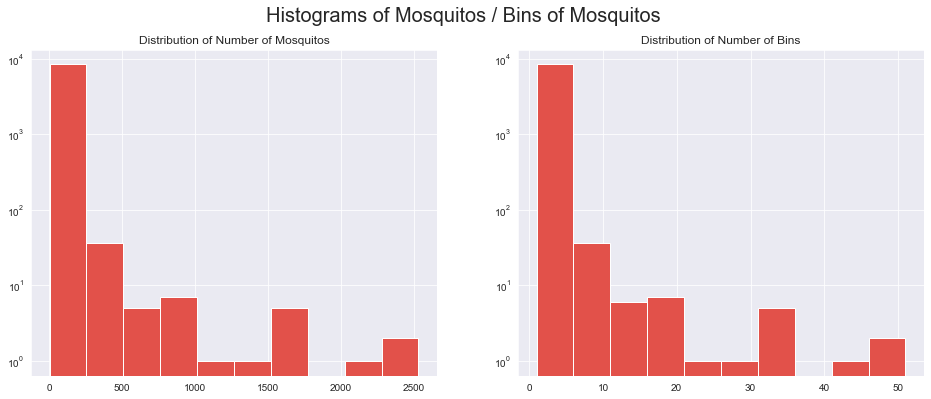

In [24]:
fig, axes = plt.subplots(ncols = 2, figsize=(16,6))
plt.suptitle('Histograms of Mosquitos / Bins of Mosquitos',fontsize=20)
df['NumMosquitos'].hist(ax = axes[0]);
axes[0].set_yscale('log')
axes[0].set_title('Distribution of Number of Mosquitos')

df['NumBins'].hist(ax = axes[1]);
axes[1].set_yscale('log')
axes[1].set_title('Distribution of Number of Bins');

**Observations**
- Majority of our rows have less than 1000 mosquitos. In total, there are perhaps approximately 100 rows that has mosquitos in excess of 1000. (This is approximated based on visualising the graph on a log scale).
- Similarly, we see the exact same pattern across Number of Bins of mosquitos and Number of Mosquitos. The distribution is the same (Heavily right skewed).

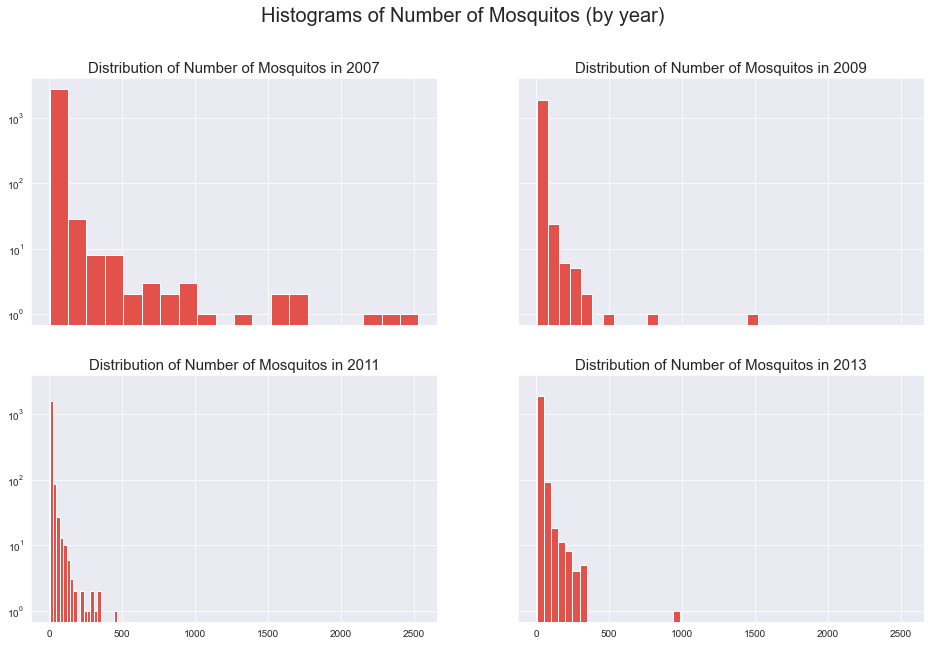

In [25]:
fig, axes = plt.subplots(2,2, figsize=(16,10),sharey=True,sharex=True)
axes = axes.ravel()
plt.suptitle('Histograms of Number of Mosquitos (by year)',fontsize=20)
years = [2007,2009,2011,2013]
for i in range(4):
    year = years[i]
    axes[i].hist(x = df[df['Year'] == year]['NumMosquitos'], bins = 20)
    axes[i].set_yscale('log')
    axes[i].set_title(f'Distribution of Number of Mosquitos in {year}',fontsize=15)

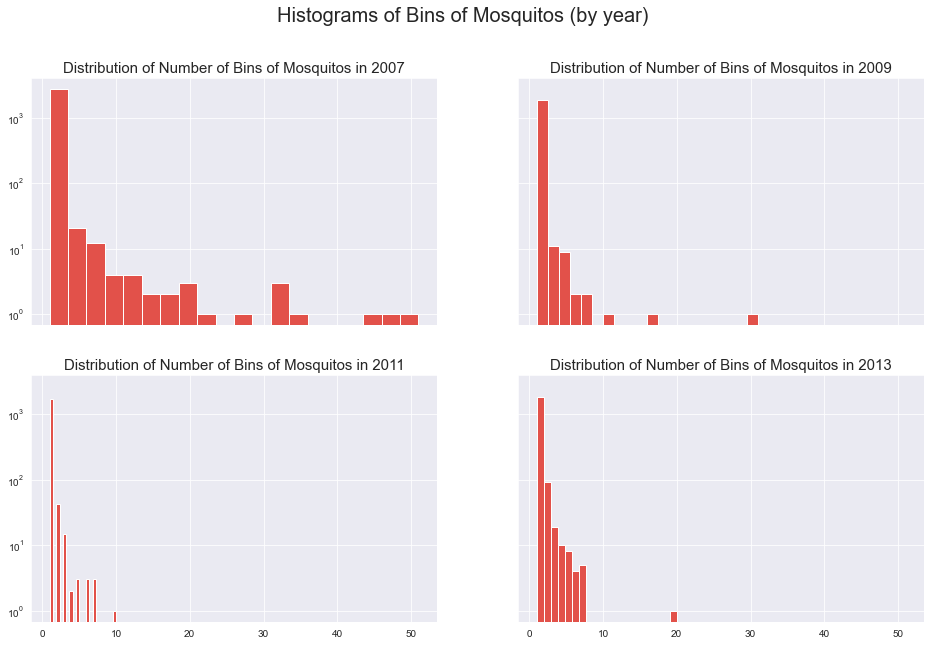

In [26]:
fig, axes = plt.subplots(2,2, figsize=(16,10),sharey=True,sharex=True)
axes = axes.ravel()
years = [2007,2009,2011,2013]
plt.suptitle('Histograms of Bins of Mosquitos (by year)',fontsize=20)
for i in range(4):
    year = years[i]
    axes[i].hist(x = df[df['Year'] == year]['NumBins'], bins = 20)
    axes[i].set_yscale('log')
    axes[i].set_title(f'Distribution of Number of Bins of Mosquitos in {year}',fontsize=15)

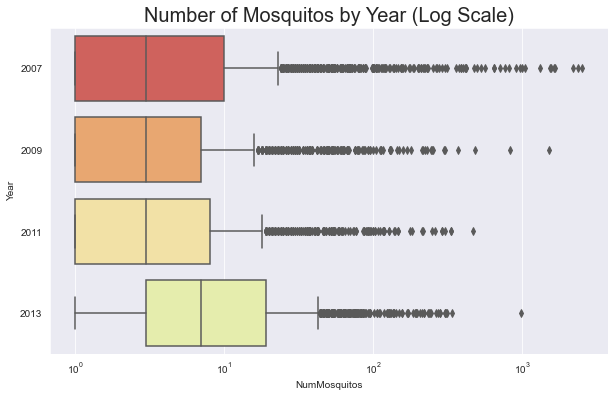

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'NumMosquitos', y = 'Year', data = df, orient='h');
plt.xscale('log');
plt.title('Number of Mosquitos by Year (Log Scale)',fontdict={'fontsize':20});

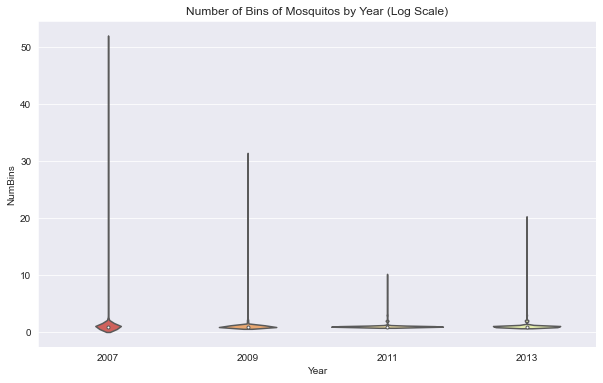

In [28]:
plt.figure(figsize = (10,6))
sns.violinplot(y = 'NumBins', x = 'Year', data = df)
#plt.xscale('log');
plt.title('Number of Bins of Mosquitos by Year (Log Scale)');

In [29]:
df.groupby('Year')['Trap'].nunique()

Year
2007    116
2009     73
2011     80
2013     74
Name: Trap, dtype: int64

In [30]:
#df['LogMosquitos'] = 1 + np.log(df['NumMosquitos'])

In [31]:
df.loc[df['NumMosquitos'] > 1000, :]

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Timestamp,Year,Month,Week,Day,WeekdayName,DayofYear,Coordinates,NumBins
564,2007-07-25,CULEX PIPIENS,T115,41.673408,-87.599862,2356,1,2007-07-25,2007,7,30,25,Wednesday,206,"(41.673408, -87.599862)",48
722,2007-08-01,CULEX PIPIENS,T115,41.673408,-87.599862,1543,0,2007-08-01,2007,8,31,1,Wednesday,213,"(41.673408, -87.599862)",31
1188,2007-08-08,CULEX PIPIENS,T115,41.673408,-87.599862,1310,1,2007-08-08,2007,8,32,8,Wednesday,220,"(41.673408, -87.599862)",27
1190,2007-08-08,CULEX PIPIENS,T138,41.726465,-87.585413,1658,1,2007-08-08,2007,8,32,8,Wednesday,220,"(41.726465000000005, -87.585413)",34
1450,2007-08-16,CULEX PIPIENS,T115,41.673408,-87.599862,2532,1,2007-08-16,2007,8,33,16,Thursday,228,"(41.673408, -87.599862)",51
1666,2007-08-22,CULEX PIPIENS,T115,41.673408,-87.599862,1554,1,2007-08-22,2007,8,34,22,Wednesday,234,"(41.673408, -87.599862)",32
1669,2007-08-22,CULEX PIPIENS,T138,41.726465,-87.585413,1054,1,2007-08-22,2007,8,34,22,Wednesday,234,"(41.726465000000005, -87.585413)",22
1897,2007-08-28,CULEX PIPIENS,T115,41.673408,-87.599862,2207,1,2007-08-28,2007,8,35,28,Tuesday,240,"(41.673408, -87.599862)",45
2032,2007-09-05,CULEX PIPIENS,T115,41.673408,-87.599862,1648,1,2007-09-05,2007,9,36,5,Wednesday,248,"(41.673408, -87.599862)",33
3196,2009-06-22,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,1520,0,2009-06-22,2009,6,26,22,Monday,173,"(41.974689, -87.890615)",31


**Observations**
- We observe that the spread of mosquitos for year 2007 (via. Number of Bins and Number of Mosquitos) is much larger than the rest. However, for the year 2013, it appears that traps have the highest median number of mosquitos (as seen from boxplot above, despite having lower spread of data. 
    - The higher spread of data in 2007 could be a result of having the highest number of trap counts in the year. 
    - Selection of trap locations could be a reason why spread of mosquitos have been reduced, yet occurrences of traps with higher number of mosquitos have drastically increased compared to previous years. 
- A quick check of the samples with more than 1000 mosquitos show that certain traps tend to have larger samples (T115, T138), so we can be sure that this isn't due to a data collection error. However, we may want to remove the rows with larger number of mosquitos as they are outliers.

### WNV Occurrence by Species

In [32]:
# Species
species = df.groupby('Species')[['NumMosquitos','NumBins','WnvPresent']].sum().reset_index()
species.sort_values(by='NumMosquitos',ascending=False)

,Species,NumMosquitos,NumBins,WnvPresent
2,CULEX PIPIENS/RESTUANS,66268,4434,225
1,CULEX PIPIENS,44671,2530,184
3,CULEX RESTUANS,23431,2544,48
6,CULEX TERRITANS,510,217,0
4,CULEX SALINARIUS,145,83,0
0,CULEX ERRATICUS,7,1,0
5,CULEX TARSALIS,7,6,0


We can see that Culex Pipiens and Culex Restuans are the mosquitos that are collected the most, and the WNV has so far only been found in these species of mosquitos for the training dataset.

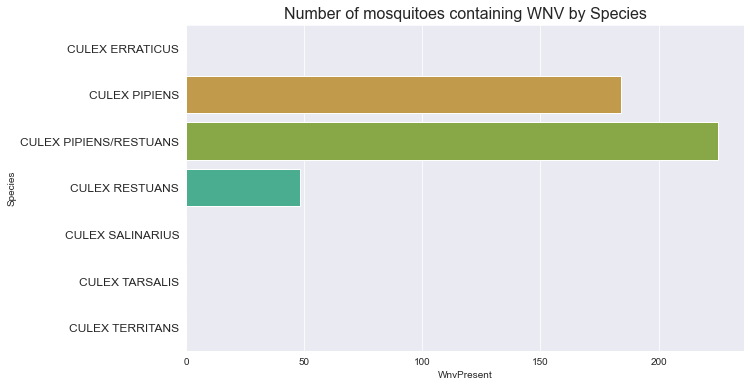

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='WnvPresent',y='Species',data=species,orient='h');
plt.title('Number of mosquitoes containing WNV by Species', fontsize=16);
plt.yticks(fontsize=12);

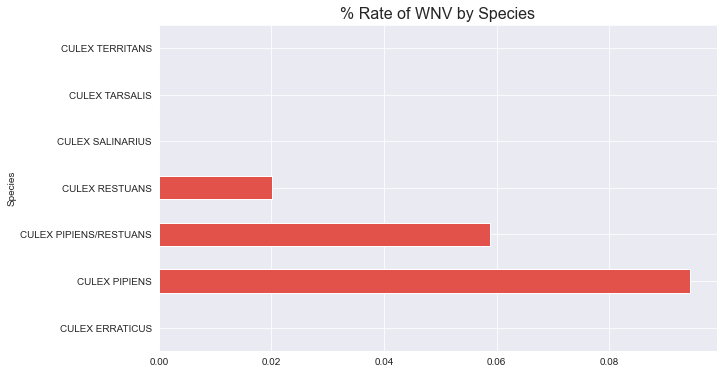

In [34]:
plt.figure(figsize=(10,6))
df.groupby('Species')['WnvPresent'].mean().plot(kind='barh')
plt.title('% Rate of WNV by Species', fontsize=16);

Since only three of the species groups have WNV present, we'll choose to add in the one-hot encoded columns for these three species.

In [35]:
species_dummy = pd.get_dummies(df['Species'])
species_dummy = species_dummy[['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS','CULEX RESTUANS']]

species_dummy

,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8470,0,0,1
8471,0,0,1
8472,0,0,1
8473,0,0,1


In [36]:
df = pd.merge(df, species_dummy,left_index=True,right_index=True)

In [37]:
df.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Timestamp,Year,Month,Week,Day,WeekdayName,DayofYear,Coordinates,NumBins,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.731922, -87.677512)",1,1,0,0
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.95469, -87.800991)",1,0,1,0
2,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.974089, -87.824812)",1,0,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.867108, -87.654224)",1,0,1,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.919343, -87.694259)",1,0,1,0


In [38]:
lats_df = df.Latitude
longs_df = df.Longitude

In [39]:
species.sort_values(by='NumMosquitos',ascending=False)

,Species,NumMosquitos,NumBins,WnvPresent
2,CULEX PIPIENS/RESTUANS,66268,4434,225
1,CULEX PIPIENS,44671,2530,184
3,CULEX RESTUANS,23431,2544,48
6,CULEX TERRITANS,510,217,0
4,CULEX SALINARIUS,145,83,0
0,CULEX ERRATICUS,7,1,0
5,CULEX TARSALIS,7,6,0


#### Visualisation of Species vs. Actual WNV (Across the Years)

In [40]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5] 
mapdata = np.loadtxt("../datasets/source/mapdata.txt")

In [41]:
species_mask_1 = df[(df['Species']=='CULEX PIPIENS')|(df['Species']=='CULEX PIPIENS/RESTUANS')|(df['Species']=='CULEX RESTUANS')]
species_mask_1.shape

(8169, 19)

In [42]:
species_mask_0 = df[(df['Species']=='CULEX TERRITANS')|(df['Species']=='CULEX SALINARIUS')|(df['Species']=='CULEX ERRATICUS')|(df['Species']=='CULEX TARSALIS')]
species_mask_0.shape

(306, 19)

In [43]:
df.shape

(8475, 19)

In [44]:
lats_df_0 = species_mask_0.Latitude
longs_df_0 = species_mask_0.Longitude

lats_df_1 = species_mask_1.Latitude
longs_df_1 = species_mask_1.Longitude

lats_df_wnv_0 = df[df['WnvPresent']==0].Latitude
longs_df_wnv_0 = df[df['WnvPresent']==0].Longitude

lats_df_wnv_1 = df[df['WnvPresent']==1].Latitude
longs_df_wnv_1 = df[df['WnvPresent']==1].Longitude

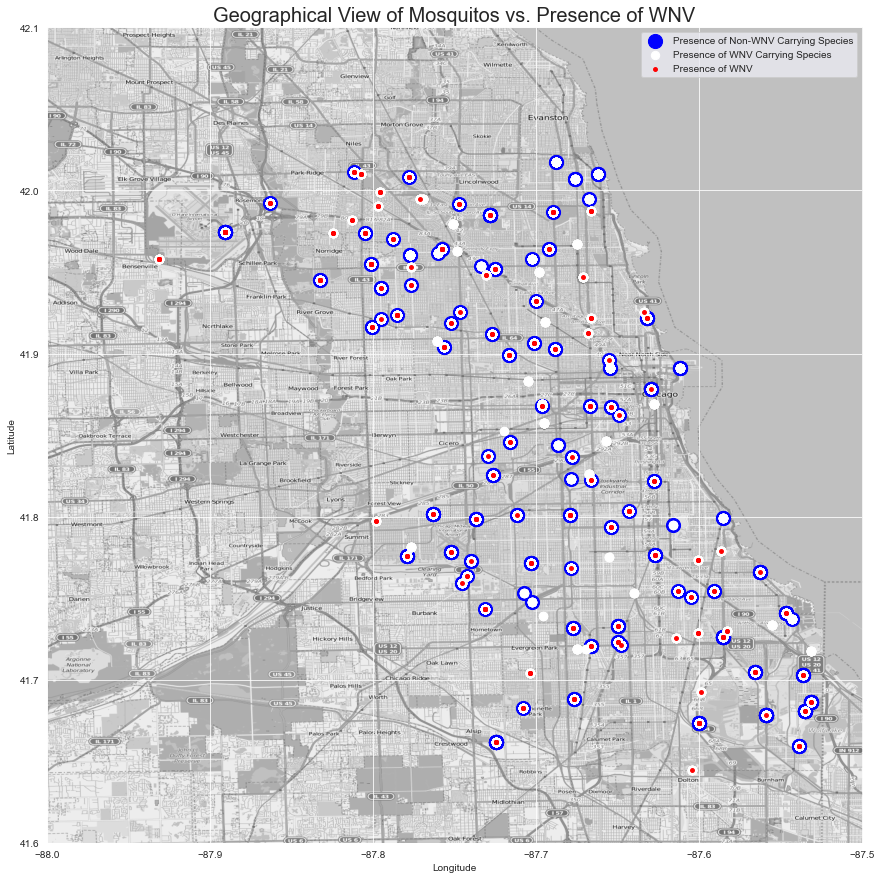

In [45]:
# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
#plt.scatter(x=longs_df, y=lats_df, c='y', s=0.5)
plt.scatter(x=longs_df_0, y=lats_df_0, c='b', s=200,label='Presence of Non-WNV Carrying Species')
plt.scatter(x=longs_df_1, y=lats_df_1, c='w', s=70,label='Presence of WNV Carrying Species')
plt.scatter(x=longs_df_wnv_1, y=lats_df_wnv_1, c='r', s=15,label='Presence of WNV')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Geographical View of Mosquitos vs. Presence of WNV',fontdict={'fontsize':20});

**Observations**
- Only two specific species of mosquitos (CULEX PIPIENS/CULEX RESTUANS) carry the WNV. Other 4 species do not appear to carry WNV.
- Of the two species, CULEX PIPIENS are abit more common and has a higher rate of carrying the WNV.
- As we observe from the map visualisation above, we observe:
    - Majority of areas with WNV-carrying mosquitos in fact, has presence of WNV. 
        - Only approximately 19 traps with WNV-carrying species are tested to have no WNV.
    - Majority of traps that have been tested to have WNV also has presence of mosquitos of non-WNV carrying species
        - Only approximately 17 traps are tested with No WNV but carries both non-WNV carrying species and WNV-carrying species
        - There are approximately 21 traps that has presence of WNV that do not have presence of non-WNV carrying species.
        

### Analyzing Traps

In [46]:
df['Trap'].nunique()

136

In [47]:
def trap_metrics(df):
    d = {}
    d['NumMosquitos'] = df['NumMosquitos'].sum()
    d['NumTests'] = df['Trap'].count()
    d['WnvPresent'] = df['WnvPresent'].sum()
    return pd.Series(d, index=['NumMosquitos','WnvPresent','NumTests'])

In [48]:
traps_count = df.groupby(['Trap']).apply(trap_metrics).reset_index()

In [49]:
traps_count.head()

,Trap,NumMosquitos,WnvPresent,NumTests
0,T001,25,0,14
1,T002,3710,15,147
2,T003,1346,14,113
3,T004,59,0,12
4,T005,50,2,14


In [50]:
# Not sure if we should classify by latitude/longitude instead
traps_info = df[['Trap','Latitude','Longitude']].drop_duplicates()
traps_info[traps_info.duplicated('Trap',keep=False)]

,Trap,Latitude,Longitude
51,T009,41.981964,-87.812827
313,T035,41.836644,-87.677737
2810,T009,41.992478,-87.862995
4744,T035,41.763733,-87.742302


- For T009 and T0035, there are different longitude and latitude values in different years. Since the values do not seem too different, we can keep the first one instead.

In [51]:
traps_count = pd.merge(traps_count, traps_info, on='Trap')

In [52]:
traps_count['InfectionRate'] = traps_count['WnvPresent'] / traps_count['NumTests']

In [53]:
traps_count.head()

,Trap,NumMosquitos,WnvPresent,NumTests,Latitude,Longitude,InfectionRate
0,T001,25,0,14,41.953705,-87.733974,0.000000
1,T002,3710,15,147,41.954690,-87.800991,0.102041
2,T003,1346,14,113,41.964242,-87.757639,0.123894
3,T004,59,0,12,41.962728,-87.748367,0.000000
4,T005,50,2,14,41.942114,-87.776385,0.142857


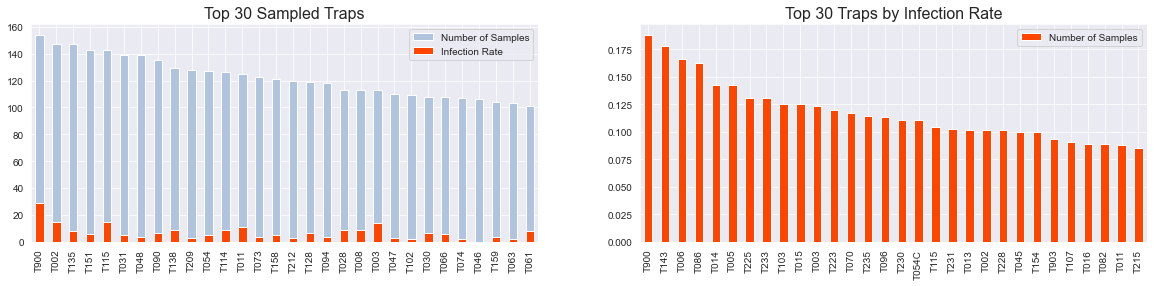

In [54]:
fig, ax = plt.subplots(ncols=2, figsize=(20,4))

traps_count.sort_values(by='NumTests',ascending=False).head(30)['NumTests'].plot(ax = ax[0], x = 'Trap', kind='bar', color = 'lightsteelblue',label='Number of Samples');
traps_count.sort_values(by='NumTests',ascending=False).head(30)['WnvPresent'].plot(ax = ax[0],x = 'Trap', kind='bar', color = 'orangered',label='Infection Rate');
ax[0].set_title("Top 30 Sampled Traps",fontsize=16);
ax[0].set_xticks(range(30));
ax[0].set_xticklabels(labels = traps_count.sort_values(by='NumTests',ascending=False).head(30)['Trap'].tolist());
ax[0].legend(loc='upper right')
traps_count.sort_values(by='InfectionRate',ascending=False).head(30)['InfectionRate'].plot(ax = ax[1],x = 'Trap', kind='bar', color = 'orangered',label='Number of Samples');
ax[1].set_title("Top 30 Traps by Infection Rate",fontsize=16);
ax[1].set_xticks(range(30))
ax[1].legend(loc='upper right');
ax[1].set_xticklabels(labels = traps_count.sort_values(by='InfectionRate',ascending=False).head(30)['Trap'].tolist());

Some traps clearly have higher infection rates compared to others, so trap data will likely be useful and we'll want to include the categorical data.

In [55]:
traps_mask = traps_count.sort_values(by='InfectionRate',ascending=False).head(30)

In [56]:
lats_traps = traps_mask.Latitude
longs_traps = traps_mask.Longitude
lats_traps_all = traps_count.Latitude
longs_traps_all = traps_count.Longitude

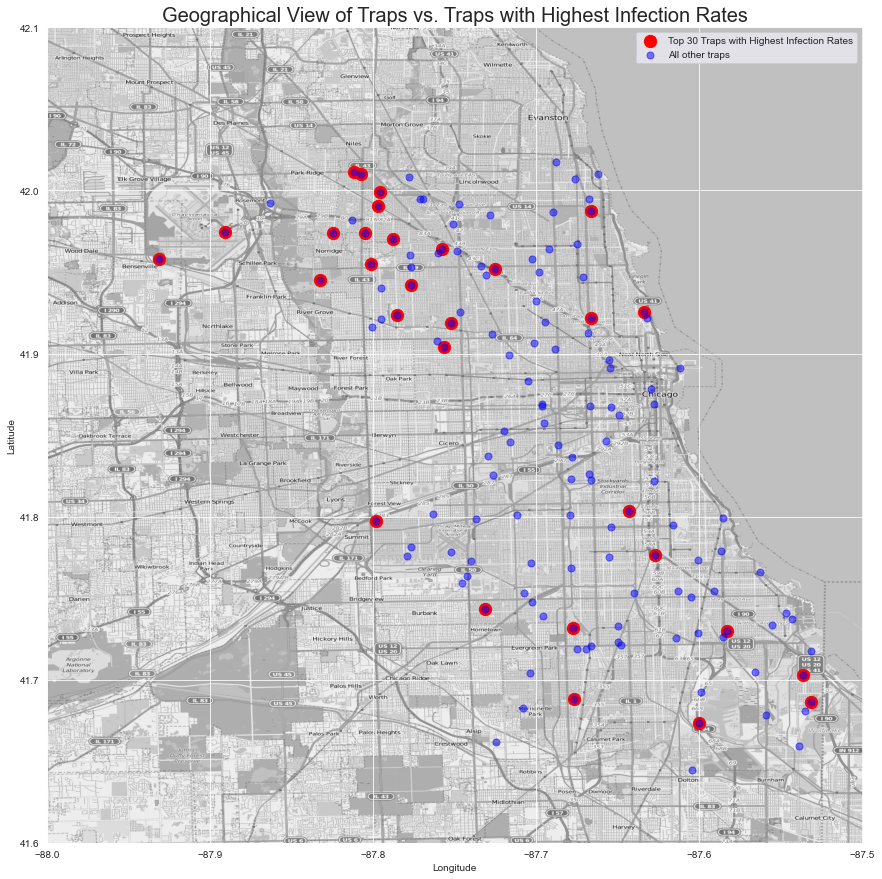

In [57]:
# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
#plt.scatter(x=longs_df, y=lats_df, c='y', s=0.5)
plt.scatter(x=longs_traps, y=lats_traps, c='r', s=150,label='Top 30 Traps with Highest Infection Rates')
plt.scatter(x=longs_traps_all, y=lats_traps_all, c='b', alpha = 0.5,s=50,label='All other traps')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Geographical View of Traps vs. Traps with Highest Infection Rates',fontdict={'fontsize':20});

There appears to be slight clustering of traps within the top 30 infectious traps, especially within Latitude 41.9 to 42.0. We will look to cluster the data by latitude and longitude in the following notebook, in order to capture this trap location information.

In [58]:
df.columns = df.columns.str.lower()

In [59]:
# Save our clean train data into a csv
df.to_csv('../datasets/train_cleaned_eda.csv',index=False)

### Creating a Train Dataset for Modeling

In [60]:
df_model = df_copy

In [61]:
df_model = df_model.drop(columns=['Address', 'Block','Street','AddressNumberAndStreet','AddressAccuracy'])

In [62]:
df_model['MultipleBins'] = 0

df_model.loc[df_model.duplicated(['Date', 'Species', 'Trap'], keep = False),'MultipleBins'] = 1

In [63]:
# Create time columns
df_model['Timestamp'] = pd.to_datetime(df_model['Date'])
df_model['Year'] = df_model['Timestamp'].dt.year
df_model['Month'] = df_model['Timestamp'].dt.month
df_model['Week'] = df_model['Timestamp'].dt.isocalendar().week
df_model['Day'] = df_model['Timestamp'].dt.day
df_model['WeekdayName'] = df_model['Timestamp'].dt.day_name()
df_model['DayofYear'] = df_model['Timestamp'].dt.dayofyear

#df_model['Coordinates'] = [(lat, long) for lat, long in zip(df_model['Latitude'], df_model['Longitude'])]

In [64]:
species_dummy_m = pd.get_dummies(df_model['Species'])
species_dummy_m = species_dummy_m[['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS','CULEX RESTUANS']]

df_model = pd.merge(df_model, species_dummy_m,left_index=True,right_index=True)

In [65]:
df_model.shape

(10506, 18)

In [66]:
df_model.drop(columns='Timestamp', inplace=True)

In [67]:
df_model.columns = df_model.columns.str.lower()

In [68]:
df_model.to_csv('../datasets/train_cleaned_modeling.csv', index=False)

### Processing the Test Dataset

In [69]:
test = pd.read_csv('../datasets/source/test.csv')

In [70]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [71]:
# Drop address columns

test = test[['Id', 'Date','Species','Trap','Latitude', 'Longitude']]

In [72]:
test['MultipleBins'] = 0

test.loc[test.duplicated(['Date', 'Species', 'Trap'], keep = False),'MultipleBins'] = 1

In [73]:
# Create new columns

test['Timestamp'] = pd.to_datetime(test['Date'])

test['Year'] = test['Timestamp'].dt.year
test['Month'] = test['Timestamp'].dt.month
test['Week'] = test['Timestamp'].dt.isocalendar().week
test['Day'] = test['Timestamp'].dt.day
test['WeekdayName'] = test['Timestamp'].dt.day_name()
test['DayofYear'] = test['Timestamp'].dt.dayofyear

# Create tuple column for coordinates
test['Coordinates'] = [(lat, long) for lat, long in zip(test['Latitude'], test['Longitude'])]

In [74]:
# Create species dummy
species_dummy_t = pd.get_dummies(test['Species'])
species_dummy_t = species_dummy_t[['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS','CULEX RESTUANS']]

test = pd.merge(test, species_dummy_t,left_index=True,right_index=True)

In [75]:
test.head()

,Id,Date,Species,Trap,Latitude,Longitude,MultipleBins,Timestamp,Year,Month,Week,Day,WeekdayName,DayofYear,Coordinates,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,1,0
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,0,1
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",1,0,0
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,0,0
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,0,0


In [76]:
test.columns = test.columns.str.lower()

In [77]:
test.drop(columns=['timestamp','coordinates'],inplace=True)

In [78]:
# Save our cleaned dataset
test.to_csv('../datasets/test_cleaned_modeling.csv',index=False)

## Weather Dataset

In [79]:
weather = pd.read_csv('../datasets/source/weather.csv')

In [80]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

There are no null values, but from the documentation, we know that the null values are represented by 'M'.

In [81]:
weather.columns = map(str.lower, weather.columns)

In [82]:
weather.duplicated().sum()

0

In [83]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [84]:
# Create time metrics
weather['date'] = pd.to_datetime(weather.date)

weather['month'] = weather['date'].dt.month
weather['week'] = weather['date'].dt.isocalendar().week
weather['year'] = weather['date'].dt.year

In [85]:
weather.groupby(['year','month'])['date'].count()

year  month
2007  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2008  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2009  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2010  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2011  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2012  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2013  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
2014  5        62
      6        60
      7        62
      8        62
      9        60
      10       62
Name: date, dtype: int64

It looks like there are two readings per day for every day from May to October, from 2007 to 2014, one from each station.

In [86]:
num_cols = weather.select_dtypes(object).columns

for i in num_cols:
    print(f"{i}:")
    print(weather[i].unique())
    print("***************")
    print('\n')

tavg:
['67' '68' '51' '52' '56' '58' 'M' '60' '59' '65' '70' '69' '71' '61' '55'
 '57' '73' '72' '53' '62' '63' '74' '75' '78' '76' '77' '66' '80' '64'
 '81' '82' '79' '85' '84' '83' '50' '49' '46' '48' '45' '54' '47' '44'
 '40' '41' '38' '39' '42' '37' '43' '86' '87' '89' '92' '88' '91' '93'
 '94' '90' '36']
***************


depart:
['14' 'M' '-3' ' 2' ' 4' ' 5' '10' '12' '13' '-2' '15' '11' '-4' '-6' ' 8'
 '-5' ' 1' ' 9' ' 6' '-9' '-8' ' 3' ' 0' '-1' '-7' ' 7' '-14' '18' '16'
 '22' '21' '20' '-10' '-16' '17' '-12' '-11' '-15' '-17' '19' '-13' '23']
***************


wetbulb:
['56' '57' '47' '48' '50' '49' '46' '54' '53' '62' '63' '60' '61' '51'
 '59' '58' '43' '44' '45' '65' '66' '67' '64' '52' '55' '69' '68' '70'
 '72' '71' '73' '74' '76' '42' '39' '40' '41' '35' '33' '34' 'M' '75' '36'
 '32' '38' '78' '77' '37']
***************


heat:
['0' '14' '13' '9' '7' 'M' '5' '6' '4' '10' '8' '12' '3' '2' '1' '15' '16'
 '19' '17' '20' '11' '18' '21' '25' '24' '27' '26' '23' '28' '22' '29']


Based on above observations, we can see that a few columns have "M" (missing) values. We have to convert them to null and change the datatype to integer/float. 
- "Depth" and "Snowfall" columns have a narrow spread of data and may not be useful
- Drop water1 column as there's only 1 unique datapoint
- Preciptotal has a 'T' value within representing trace amounts
- Sunrise and sunsets have missing values and station 2 does not have that data. We will replace the station 2 data with the station 2 values since the variation in data between locations is not that different.

In [87]:
def fill_m(df,columns):
    for i in columns:
        df[i] = df[i].apply(lambda x: np.nan if x =='M' else x)
        df[i] = df[i].apply(lambda x: 0 if x =='  T' else x)   # Make trace amounts = 0       
        df[i] = df[i].astype('float')

In [88]:
cols = ['tavg', 'depart', 'wetbulb', 'heat', 'cool', 'stnpressure','sealevel', 'avgspeed','preciptotal','snowfall']
fill_m(weather,cols)

In [89]:
sunrise = weather[weather['station'] == 1]['sunrise'].tolist()
weather.loc[weather['station'] == 2,'sunrise'] = sunrise

sunset = weather[weather['station'] == 1]['sunset'].tolist()
weather.loc[weather['station'] == 2,'sunset'] = sunset
weather.head()[['sunset','sunrise']]

,sunset,sunrise
0,1849,0448
1,1849,0448
2,1850,0447
3,1850,0447
4,1851,0446


#### Imputing Null Values

In [90]:
weather.isna().sum().sort_values(ascending=False)/len(weather)

snowfall       0.500000
depart         0.500000
cool           0.003736
tavg           0.003736
heat           0.003736
sealevel       0.003057
stnpressure    0.001359
wetbulb        0.001359
avgspeed       0.001019
preciptotal    0.000679
year           0.000000
date           0.000000
tmax           0.000000
tmin           0.000000
dewpoint       0.000000
codesum        0.000000
sunrise        0.000000
sunset         0.000000
week           0.000000
depth          0.000000
water1         0.000000
resultspeed    0.000000
resultdir      0.000000
month          0.000000
station        0.000000
dtype: float64

In [91]:
def subplot_hist(dataframe,list_of_columns, suptitle, list_of_titles,datafigsize):
    fig, ax = plt.subplots((len(list_of_columns)//3)+1, 3,figsize= datafigsize) 
    fig.suptitle(suptitle,fontsize=30)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout(h_pad = 2,pad=5);
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color="palevioletred") 
        ax[i].set_title(list_of_titles[i],fontdict={'fontsize': 15})
        ax[i].xaxis.set_visible(True)
        ax[i].axvline(dataframe[column].mean(), color='r', linestyle='dashed', linewidth=1,label='mean')
        ax[i].axvline(dataframe[column].median(), color='b', linestyle='dashed', linewidth=1,label="median")
        ax[i].legend(loc='upper left');

/Users/Alyse/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Alyse/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


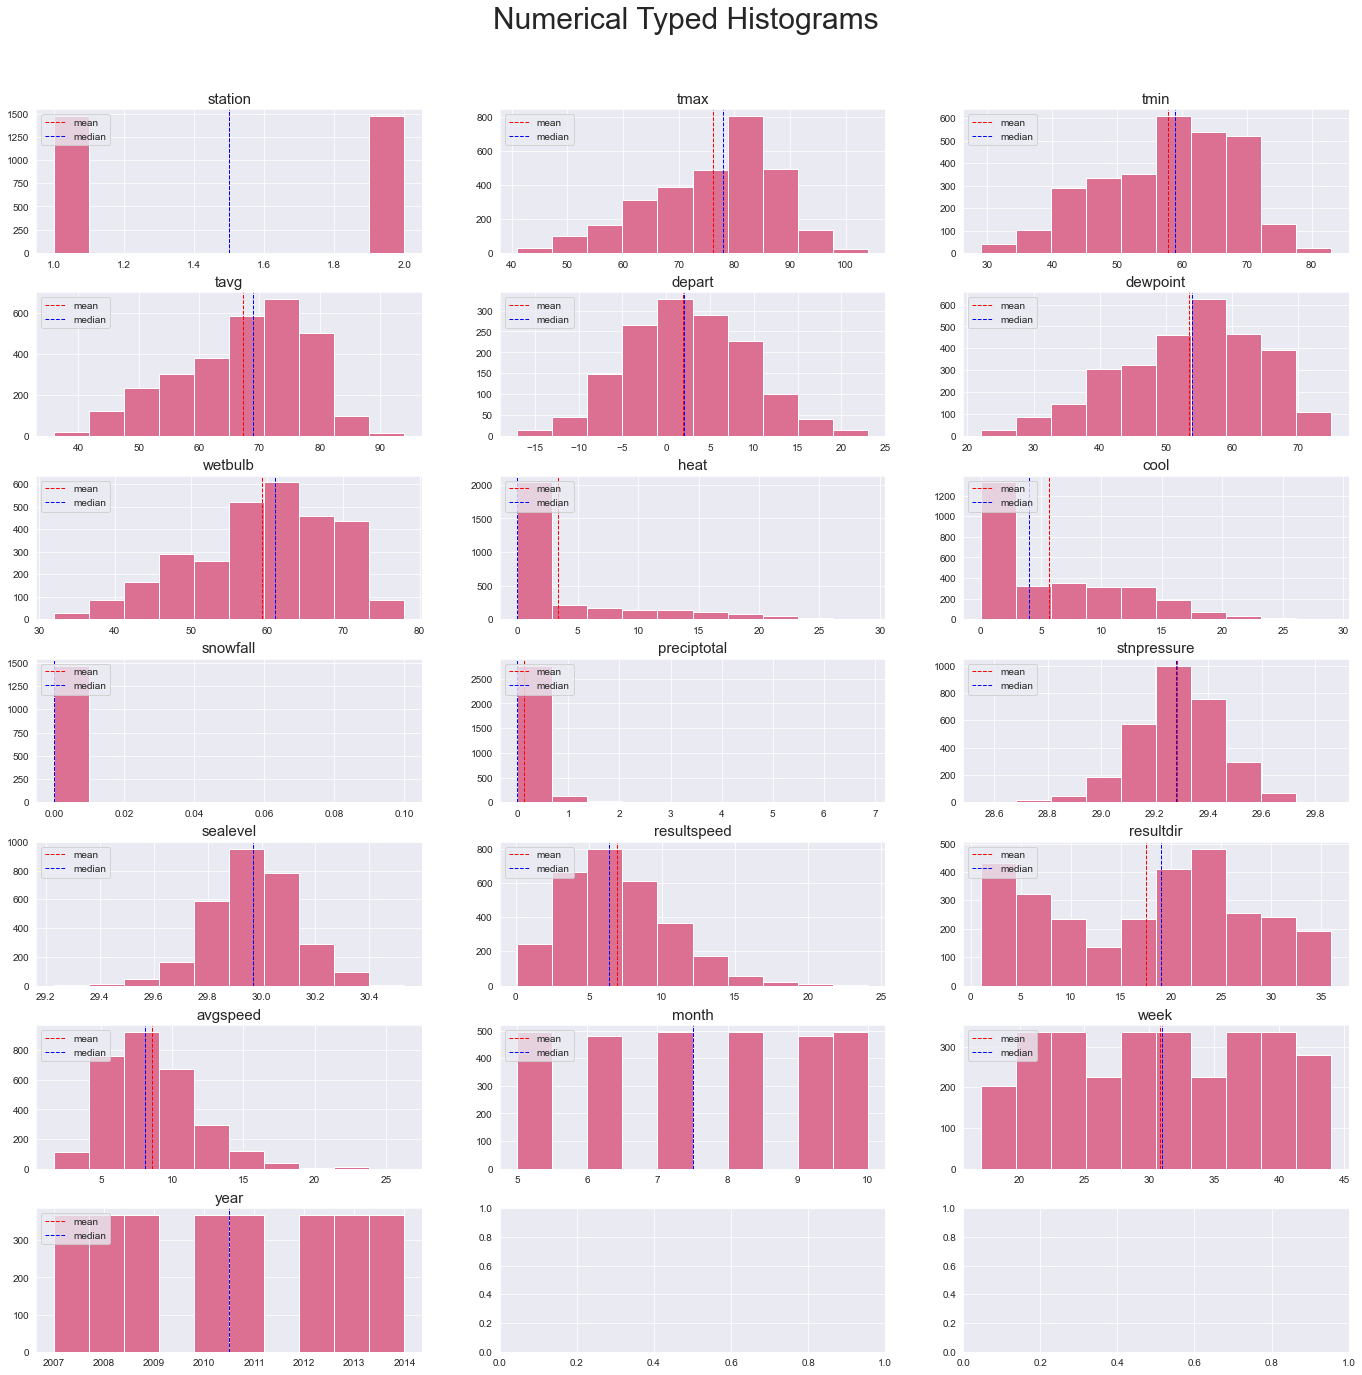

In [92]:
weather_num =  weather.select_dtypes(np.number).columns
subplot_hist(weather,weather_num,"Numerical Typed Histograms", weather_num,(20,20))

From histograms, skew analysis and missing data evaluation:
- tavg can be imputed through averaging tmax and tmin
- Impute null values with avg: avgspeed, sealevel, stnpressure, wetbulb,heat,cool
- Preciptotal null values can be filled with 0
- To drop water1 column (from the previous analysis)
- Depart and snowfall column only has station 1 information. We can read in the snowfall information, but it will not make sense to use the depart from another station. Since the spread for snowfall is relatively small, we can drop these two columns.

In [93]:
weather = weather.drop(['water1','depart','snowfall'],axis=1)

In [94]:
# Fill in nulls for selected columns with the mean of each week

to_fill_nulls = ['sealevel','wetbulb','stnpressure','avgspeed','cool','heat']

for col in to_fill_nulls:
    weather[col] = weather[col].fillna(weather.groupby('week')[col].transform('mean'))

In [95]:
# Fill in nulls for preciptotal
weather['preciptotal'] = weather['preciptotal'].fillna(0)

# Fill in nulls for t average
t_avg_nulls = weather.loc[weather['tavg'].isnull(),:][['tmax','tmin']].copy()
t_avg_series = (t_avg_nulls['tmax'] + t_avg_nulls['tmin'] / 2)
weather['tavg'] = weather['tavg'].fillna(t_avg_series)

In [96]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   float64       
 5   dewpoint     2944 non-null   int64         
 6   wetbulb      2944 non-null   float64       
 7   heat         2944 non-null   float64       
 8   cool         2944 non-null   float64       
 9   sunrise      2944 non-null   object        
 10  sunset       2944 non-null   object        
 11  codesum      2944 non-null   object        
 12  depth        2944 non-null   object        
 13  preciptotal  2944 non-null   float64       
 14  stnpressure  2944 non-null   float64       
 15  sealevel     2944 non-null   float64       
 16  result

We've removed all of the null values in the weather dataframe.

#### Creating New Features

In [97]:
# Create new feature for temp range
weather['trange'] = weather['tmax'] - weather['tmin']

In [98]:
weather['sunset'].unique()

array(['1849', '1850', '1851', '1852', '1853', '1855', '1856', '1857',
       '1858', '1859', '1860', '1901', '1902', '1903', '1904', '1905',
       '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913',
       '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921',
       '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929',
       '1930', '1931', '1900', '1854', '1848', '1846', '1845', '1843',
       '1842', '1840', '1839', '1837', '1835', '1834', '1832', '1831',
       '1829', '1827', '1826', '1824', '1822', '1821', '1819', '1817',
       '1815', '1814', '1812', '1810', '1809', '1807', '1805', '1803',
       '1760', '1758', '1756', '1755', '1753', '1751', '1749', '1748',
       '1746', '1744', '1742', '1741', '1739', '1737', '1735', '1734',
       '1732', '1730', '1729', '1727', '1725', '1724', '1722', '1720',
       '1719', '1717', '1715', '1714', '1712', '1711', '1709', '1707',
       '1706', '1704', '1703', '1701', '1660', '1658', '1657', '1656',
      

In [99]:
print(weather[weather['sunrise'].str[2:4] == str('60')].shape)
print(weather[weather['sunset'].str[2:4] == str('60')].shape)

(0, 23)
(48, 23)


There are 24 values of sunset that have wrongly formatted values. We have to correct them.

In [100]:
weather[weather['sunset'].str[2:4] == str('60')]['sunset'].head()

20     1860
21     1860
276    1760
277    1760
348    1660
Name: sunset, dtype: object

In [101]:
# Reformat wrong values
weather['sunset'] = weather['sunset'].map(lambda x : (str(int(x[0:2]) + 1) + '00') if x[2:4] == '60' else x)

# Check to make sure no more wrong values
weather[weather['sunset'].str[2:4] == str('60')]['sunset'].head()

Series([], Name: sunset, dtype: object)

In [102]:
# Create sunrise and sunset time
weather['sunrise_time'] = weather['sunrise'].map(lambda x : dt.datetime.strptime(x, '%H%M'))
weather['sunset_time'] = weather['sunset'].map(lambda x : dt.datetime.strptime(x, '%H%M'))


# Create dayhrs from time

weather['dayhrs'] = weather['sunset_time']-weather['sunrise_time']
weather['dayhrs'] = weather['dayhrs'].map(lambda x: x.seconds / 3600)

In [103]:
weather = weather.drop(columns=['sunrise_time','sunset_time','sunrise','sunset'])

We believe that a relative predictor, 'number of daylight hours' would be more useful as a feature than absolute values like 'sunset / sunrise time. That is the reason why we engineered a near feature through taking the difference for sunset and sunrise time.

In [104]:
# _CodeSum Meanings_
# 
# - +FC TORNADO/WATERSPOUT
# - FC  FUNNEL CLOUD
# - TS  THUNDERSTORM
# - GR  HAIL
# - RA RAIN
# - DZ  DRIZZLE
# - SN  SNOW
# - SG  SNOW GRAINS
# - GS  SMALL HAIL &/OR SNOW PELLETS
# - PL  ICE PELLETS
# - IC  ICE CRYSTALS
# - FG+ HEAVY FOG (FG & LE.25 MILES VISIBILITY)
# - FG  FOG
# - BR  MIST
# - UP  UNKNOWN PRECIPITATION
# - HZ  HAZE
# - FU  SMOKE
# - VA  VOLCANIC ASH
# - DU  WIDESPREAD DUST
# - DS  DUSTSTORM
# - PO  SAND/DUST WHIRLS
# - SA  SAND
# - SS  SANDSTORM
# - PY  SPRAY
# - SQ  SQUALL
# - DR  LOW DRIFTING
# - SH  SHOWER
# - FZ  FREEZING
# - MI  SHALLOW
# - PR  PARTIAL
# - BC  PATCHES
# - BL  BLOWING
# - VC  VICINITY
# - LIGHT
# +   HEAVY
# - "NO SIGN" MODERATE

In [105]:
codesum = weather['codesum']

codesum = " ".join(codesum)
codesum = codesum.split()
codesum_n = set(codesum)
codesum_n = list(codesum_n)

In [106]:
for cs in codesum_n:
    weather[cs] = weather['codesum'].map(lambda x: 1 if cs in x.split() else 0)
    
weather.shape

(2944, 38)

In [107]:
rain_bool = weather["codesum"].str.contains("TS|RA|DZ|SH|UP")
weather['rain'] = rain_bool
weather['rain'] = weather['rain'].map(lambda x: 1 if x else 0)

We have seperated all the different codes within codesum, which shares with us information regarding the specific weather observed at the station, on that day. Also, we have created a boolean feature to see whether there is rain on that day. This is done by extracting the different types of 'rain' as documented in the NOAA supporting document. 

In [108]:
# Save weather csv

weather.to_csv('../datasets/weather_cleaned.csv',index=False)

## Cleaning Spray Dataset

In [129]:
spray = pd.read_csv('../datasets/source/spray.csv')

In [130]:
print(spray.shape)
spray.head()

(14835, 4)


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [131]:
spray.columns = spray.columns.str.lower()

In [132]:
spray['date'] = pd.to_datetime(spray['date'])
spray.set_index('date', inplace=True)
spray.sort_index(inplace=True)

In [133]:
spray.head()

,time,latitude,longitude
date,,,
2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29,6:57:38 PM,42.390410,-88.088858


In [134]:
spray[spray.duplicated(keep=False)].shape

(543, 3)

In [135]:
# Drop spray duplicates
spray.drop_duplicates(keep='first',inplace=True)

In [136]:
spray.isnull().sum()

time         584
latitude       0
longitude      0
dtype: int64

In [137]:
spray[spray['time'].isnull()].head()

,time,latitude,longitude
date,,,
2011-09-07,NaN,41.987092,-87.794286
2011-09-07,NaN,41.987620,-87.794382
2011-09-07,NaN,41.988004,-87.794574
2011-09-07,NaN,41.988292,-87.795486
2011-09-07,NaN,41.988100,-87.796014


In [138]:
# Time is not really important anyway so let's drop it
spray.drop(columns='time', inplace=True)

In [139]:
spray['year'] = spray.index.year
spray['month'] = spray.index.month
spray['week'] = spray.index.isocalendar().week

In [140]:
print(spray['year'].unique())
print(spray['month'].unique())
print(spray['week'].unique())

[2011 2013]
[8 9 7]
<IntegerArray>
[35, 36, 29, 30, 32, 33, 34]
Length: 7, dtype: UInt32


In [141]:
spray.groupby(['year','month','week'])['latitude'].count()

year  month  week
2011  8      35        95
      9      36      1573
2013  7      29      2202
             30      1607
      8      32      1195
             33      2809
             34      1587
             35      2302
      9      36       924
Name: latitude, dtype: int64

#### Dropping spray data beyond the borders of the map

In [144]:
traps_count.head()

,Trap,NumMosquitos,WnvPresent,NumTests,Latitude,Longitude,InfectionRate
0,T001,25,0,14,41.953705,-87.733974,0.000000
1,T002,3710,15,147,41.954690,-87.800991,0.102041
2,T003,1346,14,113,41.964242,-87.757639,0.123894
3,T004,59,0,12,41.962728,-87.748367,0.000000
4,T005,50,2,14,41.942114,-87.776385,0.142857


In [145]:
lats_traps_all = traps_count.Latitude
longs_traps_all = traps_count.Longitude

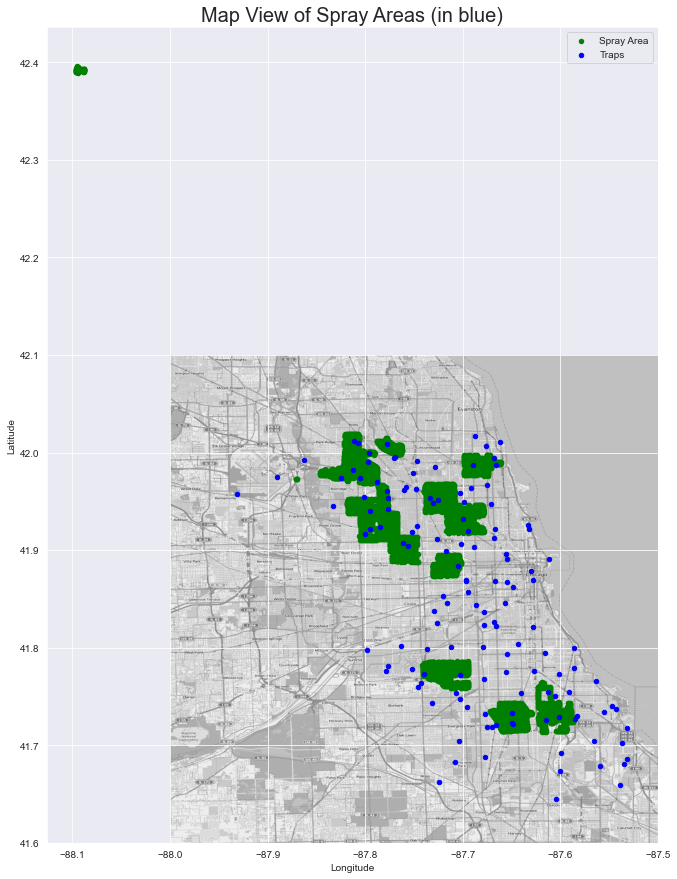

In [149]:
spray_lat = spray.latitude
spray_long = spray.longitude

# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
#plt.scatter(x=longs_df, y=lats_df, c='y', s=0.5)
plt.scatter(x=spray_long, y=spray_lat, c='g', s=20,label='Spray Area')
plt.scatter(x=longs_traps_all, y=lats_traps_all, c='b', s=20,label='Traps')
#plt.scatter(x=longs_df_1, y=lats_df_1, c='w', s=70,label='Presence of WNV Carrying Species')
#plt.scatter(x=longs_df_wnv_1, y=lats_df_wnv_1, c='r', s=15,label='Presence of WNV')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Map View of Spray Areas (in blue)',fontdict={'fontsize':20});

In [122]:
spray['latitude'].sort_values(ascending=True)

date
2013-08-22    41.713925
2013-08-22    41.714005
2013-08-22    41.714042
2013-07-17    41.714098
2013-07-17    41.714112
                ...    
2011-08-29    42.395095
2011-08-29    42.395218
2011-08-29    42.395352
2011-08-29    42.395697
2011-08-29    42.395983
Name: latitude, Length: 14294, dtype: float64

In [123]:
#spray.drop(spray[spray['latitude']<41.6].index,inplace=True)

In [124]:
spray['longitude'].sort_values(ascending=True)

date
2011-08-29   -88.096468
2011-08-29   -88.096447
2011-08-29   -88.096445
2011-08-29   -88.096443
2011-08-29   -88.096440
                ...    
2013-08-22   -87.586792
2013-08-22   -87.586787
2013-08-22   -87.586775
2013-08-22   -87.586755
2013-08-22   -87.586727
Name: longitude, Length: 14294, dtype: float64

In [125]:
spray.head()

,latitude,longitude,year,month,week
date,,,,,
2011-08-29,42.391623,-88.089163,2011,8,35
2011-08-29,42.391348,-88.089163,2011,8,35
2011-08-29,42.391022,-88.089157,2011,8,35
2011-08-29,42.390637,-88.089158,2011,8,35
2011-08-29,42.390410,-88.088858,2011,8,35


**Observation**
- An anomaly is observed that is far away from the bulk of our trap data. 
- This anomaly is out of the range of our map, in which we have been analysing our trap data.
- Moreover, no traps are found in that specific sprayed area. Hence no mosquito data are collected.
- Hence, we will drop this datapoint.

In [126]:
spray.drop(spray[spray['longitude']<-88.0].index,inplace=True)

In [127]:
spray.to_csv('../datasets/spray_cleaned_eda.csv',index=True)